In [1]:
import sys
sys.path.append("../..")

In [2]:
import nest_asyncio
nest_asyncio.apply()

In [3]:
# environments

from environment.qlearning.obstacle_avoidance_env import ObstacleAvoidanceEnv

In [4]:
from utils.reader import get_yaml_path, read_file

In [5]:
from agent.qagent import QAgent

In [6]:
from evaluation.agent_evaluation import evaluate

2025-11-27 19:25:18.245302: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-27 19:25:18.278873: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-27 19:25:21.167666: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [7]:
from utils.plotting import plot_all_q_agent

In [8]:
server_address = "localhost:50051" # adjust the port as needed
client_name = "RLClient"
env = ObstacleAvoidanceEnv(server_address, client_name) # adjust the env as needed
env.connect_to_client()

2025-11-27 19:25:22,031 — INFO — ✓ Connected to localhost:50051



In [9]:
agents = {
    f"00000000-0000-0000-0000-{(i+1):012d}": QAgent(env)
    for i in range(30)
}
# agent = QAgent(env)
# agent_id = "00000000-0000-0000-0000-000000000001"
# agents = { agent_id: agent }

In [10]:
configs_path = get_yaml_path("src", "scripts", "resources", "generated", "evaluation", "q-obstacle-avoidance", "multi-agent")
yml_files = sorted(configs_path.glob("*.yml"), key=lambda p: p.name)
configs = [read_file(f) for f in yml_files]
print(len(configs))

10


In [11]:
agent_path = get_yaml_path("src", "scripts", "resources", "generated", "checkpoints", "obstacle-avoidance", "q-learning", "v1", "oa_ep884")
for agent in agents.values():
    agent.load(agent_path)

2025-11-27 19:25:22,047 — INFO — Agent loaded from /home/simone/uni-lab/PPS/2024/SRS/PPS-22-srs/refactor/environment-generation/python/src/scripts/resources/generated/checkpoints/obstacle-avoidance/q-learning/v1/oa_ep884.npz
2025-11-27 19:25:22,048 — INFO —   Q-table shape: (64, 5)
2025-11-27 19:25:22,048 — INFO —   Current epsilon: 0.1318
2025-11-27 19:25:22,048 — INFO —   Total episodes trained: 884
2025-11-27 19:25:22,049 — INFO — Agent loaded from /home/simone/uni-lab/PPS/2024/SRS/PPS-22-srs/refactor/environment-generation/python/src/scripts/resources/generated/checkpoints/obstacle-avoidance/q-learning/v1/oa_ep884.npz
2025-11-27 19:25:22,050 — INFO —   Q-table shape: (64, 5)
2025-11-27 19:25:22,050 — INFO —   Current epsilon: 0.1318
2025-11-27 19:25:22,050 — INFO —   Total episodes trained: 884
2025-11-27 19:25:22,051 — INFO — Agent loaded from /home/simone/uni-lab/PPS/2024/SRS/PPS-22-srs/refactor/environment-generation/python/src/scripts/resources/generated/checkpoints/obstacle-av

In [12]:
did_succeed=lambda reward, termination, truncation: True if truncation and reward > -500 else False

In [13]:
results = evaluate(env=env, agents=agents, configs=configs, max_steps=5000, did_succeed=did_succeed)

Evaluation: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [03:54<00:00, 23.47s/configuration run]


In [14]:
print(f"success_rate:             {results["success_rate"]}")
print(f"median steps to success:  {results["median_steps_to_success"]}")

success_rate:             {'00000000-0000-0000-0000-000000000001': 1.0, '00000000-0000-0000-0000-000000000002': 0.8, '00000000-0000-0000-0000-000000000003': 0.9, '00000000-0000-0000-0000-000000000004': 0.9, '00000000-0000-0000-0000-000000000005': 0.8, '00000000-0000-0000-0000-000000000006': 0.9, '00000000-0000-0000-0000-000000000007': 0.6, '00000000-0000-0000-0000-000000000008': 0.7, '00000000-0000-0000-0000-000000000009': 0.8, '00000000-0000-0000-0000-000000000010': 0.9, '00000000-0000-0000-0000-000000000011': 0.4, '00000000-0000-0000-0000-000000000012': 0.8, '00000000-0000-0000-0000-000000000013': 1.0, '00000000-0000-0000-0000-000000000014': 0.9, '00000000-0000-0000-0000-000000000015': 0.9, '00000000-0000-0000-0000-000000000016': 0.9, '00000000-0000-0000-0000-000000000017': 0.9, '00000000-0000-0000-0000-000000000018': 1.0, '00000000-0000-0000-0000-000000000019': 0.9, '00000000-0000-0000-0000-000000000020': 0.9, '00000000-0000-0000-0000-000000000021': 0.8, '00000000-0000-0000-0000-000

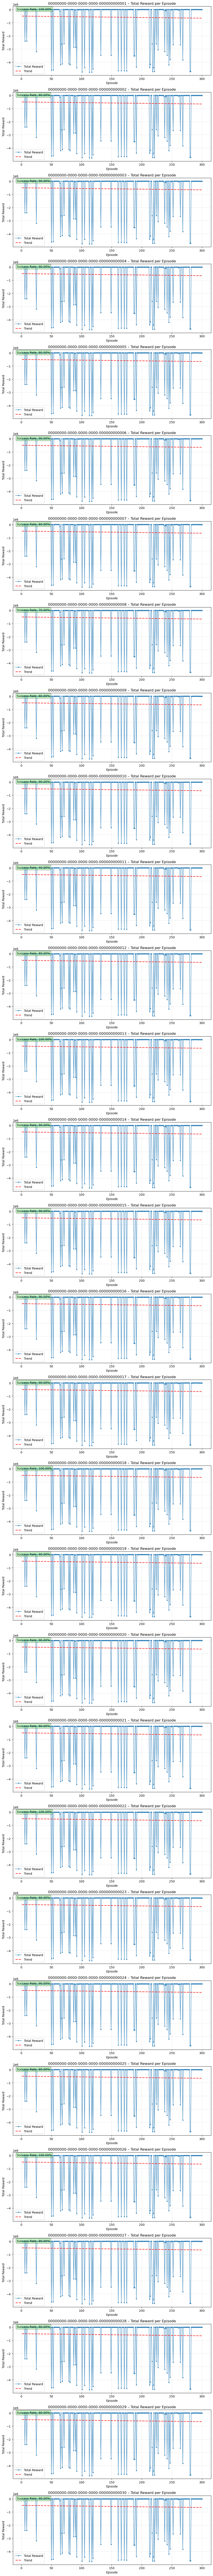

In [ ]:
plot_all_q_agent(results, agents=list(agents.keys()))